<a href="https://colab.research.google.com/github/MariamZayed/Computer_Vision_labs/blob/main/Lab5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Section

In [35]:
from google.colab.patches import cv2_imshow as cv_imshow

In [36]:
import numpy as np
import cv2 as cv

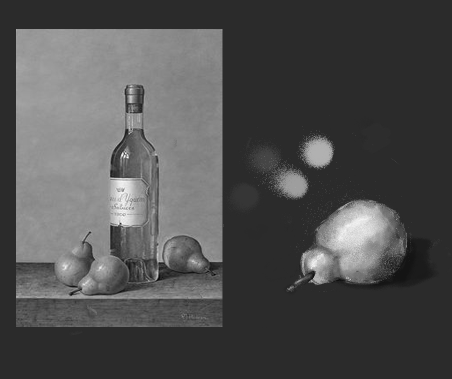

In [37]:
img = cv.imread('circle.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.resize(gray,(0,0),fx=0.25, fy=0.25)
img = cv.resize(img,(0,0),fx=0.25, fy=0.25)

cv_imshow(gray)

> ## Harris Corner Dedection 

**Steps**
1.  Determine which windows produce very large variations in intensity when moved in the x and y-direction.
2. With each such window found a score R is computed.
3. After applying a threshold to this score, important corners are selected& marked.

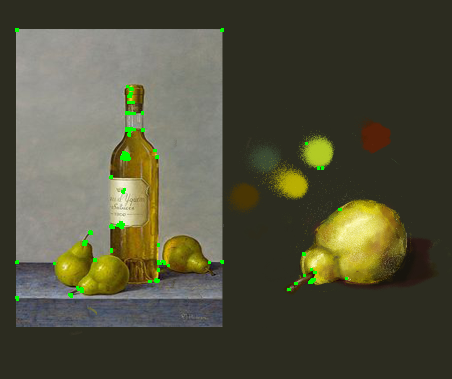

In [55]:
gray=np.float32(gray)
corners = cv.cornerHarris(gray, 2, 3, 0.04)

# it gives bigger(dailate) size to the corner points
corners = cv.dilate(corners, None)

#applying some threshold, it varies as what output we want. so don't concetrate on it
#threshold is an array holds booleans, True for good threshold and false for otherwise
threshold = corners > .05*corners.max()

#show the colored image and above it the filtered points who holds selected ture thresholds corner
#this mean give it blue color
img[threshold] = (0,255,0)

cv_imshow(img)

- cv2.cornerHarris(img, blockSize,ksize, k )
- img : Input image, it should be grayscale and float32 type.
- blockSize : It is the size of neighborhood considered for corner detection.
- ksize : Aperture parameter of Sobel derivative use, it's the window/kernel size in sobel algoritm
- k : Harris detector free parameter in the equation. 
-- حرف ال كاي ده موجد في المعادله بتاعت ال هاريس كورنور


> ## Shi-Tomasi Corner Detection

**steps**
- compute the corners by thi-tomasi function
- convert it to intger (it's optional, however we dont have float values, for that we'going to convert it to int.
- user the ravel() function, the output of the shi-tomasi is multidiminsion. we cant deal with multi so we're going to convert it to 1D array
- use the cv.circle() to make the 2D point and represent it as circle

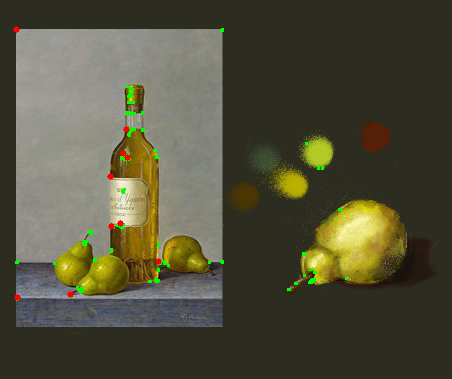

In [65]:
max_corner = 10 
quality_corner = 0.01
min_euclidean = 5
shi_corners = cv.goodFeaturesToTrack(gray, max_corner, quality_corner, min_euclidean)
shi_corners = np.int0(shi_corners)

# We cant show the shi_corners with cv_imshow() because it's implemented as multideminsion arr
# so we're going to flaten it to return each point as contiguous flattened 1D array.
# then we will take the 1D array and pass it as (x,y) poing to cv.circle()

radius = 3
color = (0,0,255)
thickness = -1

for i in shi_corners:
  x,y = i.ravel() #it will flatten the multidiminsion array
  cv.circle(img, (x,y), radius, color, thickness)
cv_imshow(img)